# Data preprocessing and split

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.13.0


In [14]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data.dropna()
regression_data = data.loc[data['Knocking'] == 0]
regression_data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
547,546.0,2000,-10,30,283,0.975,288.8,1.069,858.7,36.89,39.8,27.96,1.33,8.67,10.1,307.4,2.91,222.7,0.0,0.0
548,547.0,2000,-10,30,293,0.974,295.5,1.068,858.6,36.61,39.5,27.48,1.32,8.6,9.98,307.2,2.99,220.9,0.0,0.0
549,548.0,2000,-10,30,303,0.974,302.3,1.067,858.1,36.35,39.2,27.62,1.31,8.53,9.86,307.5,3.03,221.4,0.0,0.0
550,549.0,2000,-10,35,283,0.982,288.8,1.07,861.2,37.35,40.9,27.25,1.39,8.82,10.31,304.4,3.23,215.2,0.0,0.0
551,550.0,2000,-10,35,293,0.982,295.6,1.069,858.9,37.1,40.6,27.41,1.39,8.75,10.19,306.1,3.09,221.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [15]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case                             1064 non-null   float64
 1   Engine Speed                     1064 non-null   object 
 2   Spark Timing                     1064 non-null   object 
 3   Throttle Angle                   1064 non-null   object 
 4   Ambient Temperature              1064 non-null   object 
 5   Intake Pressure                  1064 non-null   object 
 6   Intake Temperature               1064 non-null   object 
 7   Exhaust Pressure                 1064 non-null   object 
 8   Exhaust Temperature              1064 non-null   object 
 9   Injected Mass                    1064 non-null   object 
 10  Maximum Pressure                 1064 non-null   object 
 11  Crank Angle at Maximum Pressure  1064 non-null   object 
 12  Maximum Rate of Pressur

In [16]:
input_data = regression_data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
input_data
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Engine Speed         1064 non-null   object
 1   Spark Timing         1064 non-null   object
 2   Throttle Angle       1064 non-null   object
 3   Ambient Temperature  1064 non-null   object
 4   Intake Pressure      1064 non-null   object
 5   Intake Temperature   1064 non-null   object
 6   Exhaust Pressure     1064 non-null   object
 7   Exhaust Temperature  1064 non-null   object
 8   Injected Mass        1064 non-null   object
dtypes: object(9)
memory usage: 83.1+ KB


In [17]:
output_data = regression_data.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17]]
output_data
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Maximum Pressure                 1064 non-null   object
 1   Crank Angle at Maximum Pressure  1064 non-null   object
 2   Maximum Rate of Pressure Rise    1064 non-null   object
 3   BMEP                             1064 non-null   object
 4   IMEP                             1064 non-null   object
 5   BSFC                             1064 non-null   object
 6   BSNOx                            1064 non-null   object
 7   BSCO                             1064 non-null   object
dtypes: object(8)
memory usage: 74.8+ KB


In [18]:
input_data=input_data.astype('float')
output_data = output_data.astype('float')
input_data.info()
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine Speed         1064 non-null   float64
 1   Spark Timing         1064 non-null   float64
 2   Throttle Angle       1064 non-null   float64
 3   Ambient Temperature  1064 non-null   float64
 4   Intake Pressure      1064 non-null   float64
 5   Intake Temperature   1064 non-null   float64
 6   Exhaust Pressure     1064 non-null   float64
 7   Exhaust Temperature  1064 non-null   float64
 8   Injected Mass        1064 non-null   float64
dtypes: float64(9)
memory usage: 83.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Maximum Pressure                 1064 non-null   float64
 1   Crank Angle 

In [19]:
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, shuffle = True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42)
print(train_input.shape, train_output.shape)
print(val_input.shape, val_output.shape)
print(test_input.shape, test_output.shape)


(638, 9) (638, 8)
(213, 9) (213, 8)
(213, 9) (213, 8)


In [20]:
print(test_output.index)

Index([ 578, 2135, 1282, 1743, 1854, 1499, 1510, 1522,  746, 1280,
       ...
       1465, 1993, 2019, 1216,  766, 1512,  715,  780, 2087,  572],
      dtype='int64', length=213)


In [21]:
ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale =  ss.transform(val_input)
test_scale =  ss.transform(test_input)

# DNN Model

In [22]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='elu', input_shape = (9, )))
model.add(keras.layers.Dense(128, activation='elu'))
model.add(keras.layers.Dense(64, activation='elu'))
model.add(keras.layers.Dense(32, activation= 'elu'))
model.add(keras.layers.Dense(16, activation= 'elu'))
model.add(keras.layers.Dense(8))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2560      
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
Total params: 46456 (181.47 KB)
Trainable params: 4645

In [23]:
#initial_learning_rate = 0.01
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    #initial_learning_rate,
    #decay_steps=100000,
    #decay_rate=0.96,
    #staircase=True)

In [24]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-multiregression-model.h5')
callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience=20, verbose=True)
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss = 'mse', metrics=['mae', 'mse'])
history = model.fit(train_scale, train_output, batch_size=32, validation_data=(val_scale, val_output) ,epochs=10000, callbacks=[callback])

Epoch 1/10000


2024-03-21 16:52:46.182454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 1s 38ms/step - loss: 25246.9785 - mae: 89.9806 - mse: 25246.9785 - val_loss: 24737.5312 - val_mae: 89.2673 - val_mse: 24737.5312
Epoch 2/10000


2024-03-21 16:52:46.994943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 25ms/step - loss: 24536.6543 - mae: 88.3195 - mse: 24536.6543 - val_loss: 23361.9395 - val_mae: 86.9344 - val_mse: 23361.9395
Epoch 3/10000
20/20 [==============================] - 0s 23ms/step - loss: 20905.3262 - mae: 85.1917 - mse: 20905.3262 - val_loss: 16063.0801 - val_mae: 81.5269 - val_mse: 16063.0801
Epoch 4/10000
20/20 [==============================] - 0s 24ms/step - loss: 10758.6562 - mae: 73.9935 - mse: 10758.6562 - val_loss: 6482.3774 - val_mae: 58.5648 - val_mse: 6482.3774
Epoch 5/10000
20/20 [==============================] - 0s 22ms/step - loss: 4310.9238 - mae: 44.9416 - mse: 4310.9238 - val_loss: 3006.4565 - val_mae: 34.7703 - val_mse: 3006.4565
Epoch 6/10000
20/20 [==============================] - 0s 24ms/step - loss: 2117.4399 - mae: 30.5151 - mse: 2117.4399 - val_loss: 1422.6447 - val_mae: 23.9757 - val_mse: 1422.6447
Epoch 7/10000
20/20 [==============================] - 0s 23ms/step - loss: 862.4830 - mae: 19.7778 - ms

In [25]:
model.save('best-multiregression-model.h5')
model = keras.models.load_model('best-multiregression-model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
hist = history.history
hist['epochs'] = history.epoch
epochs = hist['epochs']
loss = hist['loss']
val_loss = hist['val_loss']
mae = hist['mae']
val_mae = hist['val_mae']
mse = hist['mse']
val_mse = hist['mse']
def plot_history(history):

    fig, axes = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 5))
    axes[0].plot(epochs, loss, label = 'Training_loss')
    axes[0].plot(epochs, val_loss, label = 'val_loss')
    axes[1].plot(epochs, mae, label = 'Training_mae')
    axes[1].plot(epochs, val_mae, label = 'val_mae')
    axes[2].plot(epochs, mse, label = 'Training_mse')
    axes[2].plot(epochs, val_mse, label = 'val_mse')
    axes[0].set_title('Training and validation loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[1].set_title('Training and validation mae')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('MAE')
    axes[2].set_title('Training and validation mse')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('MSE')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    plt.show()
    


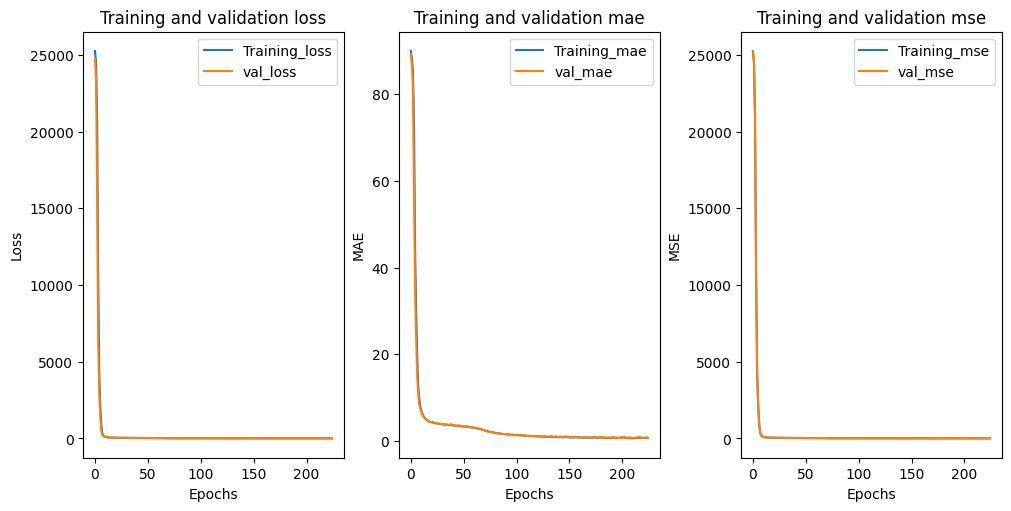

In [27]:
plot_history(history)

In [28]:
loss_mae_mse_df = pd.DataFrame(((loss[i], val_loss[i], mae[i], val_mae[i],  mse[i], val_mse[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'MAE', 'Val_MAE', 'MSE', 'Val_MSE'])
loss_mae_mse_df

,Loss,Val_Loss,MAE,Val_MAE,MSE,Val_MSE
0,25246.978516,24737.531250,89.980629,89.267311,25246.978516,25246.978516
1,24536.654297,23361.939453,88.319550,86.934357,24536.654297,24536.654297
2,20905.326172,16063.080078,85.191689,81.526901,20905.326172,20905.326172
3,10758.656250,6482.377441,73.993507,58.564838,10758.656250,10758.656250
4,4310.923828,3006.456543,44.941631,34.770294,4310.923828,4310.923828
...,...,...,...,...,...,...
220,1.182603,1.353868,0.658722,0.673652,1.182603,1.182603
221,1.372213,1.528177,0.708668,0.706214,1.372213,1.372213
222,1.095421,1.116454,0.653444,0.636297,1.095421,1.095421
223,1.236162,1.929908,0.693565,0.811065,1.236162,1.236162


In [29]:
loss_mae_mse_df.to_csv('Loss_Mae_Mse_df.csv', index = True)

In [30]:
model.evaluate(test_scale, test_output)
model.evaluate(train_scale, train_output)
model.evaluate(val_scale, val_output)

7/7 [==============================] - 0s 14ms/step - loss: 1.2586 - mae: 0.6620 - mse: 1.2586


2024-03-21 16:54:27.523709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 13ms/step - loss: 1.2536 - mae: 0.6713 - mse: 1.2536


[1.2535898685455322, 0.6713480949401855, 1.2535898685455322]

In [31]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)

11/20 [===============>..............] - ETA: 0s

2024-03-21 16:54:28.179454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 5ms/step


In [32]:
predicted_test_df = pd.DataFrame(predicted_test)
predicted_train_df = pd.DataFrame(predicted_train)
predicted_val_df = pd.DataFrame(predicted_val)

In [33]:
predicted_test_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_train_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_val_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']

In [34]:
predicted_test_df.index = test_output.index
predicted_train_df.index = train_output.index
predicted_val_df.index = val_output.index

In [35]:
def DataFrame(predicted_df, df_outuput, output_df):
   for i in range(8):
      predicted_df.insert(2*i+1, df_outuput.columns[i], output_df.iloc[:, [i]])
   predicted_df

In [36]:
predicted_test_df

,Maximum Pressure(predicted),Crank Angle at Maximum Pressure(predicted),Maximum Rate of Pressure Rise(predicted),BMEP(predicted),IMEP(predicted),BSFC(predicted),BSNOx(predicted),BSCO(predicted)
578,41.259331,27.432543,2.103058,9.011494,10.787830,303.309113,4.018381,217.690613
2135,32.206280,37.307999,0.653992,7.739918,9.826553,429.305298,1.368078,404.571747
1282,64.593712,19.054041,2.611458,11.117397,13.669003,295.031708,4.886276,241.246002
1743,39.932472,34.230484,1.246048,9.199284,11.525459,378.281616,2.092350,342.452728
1854,59.056873,20.745958,2.567478,9.826672,12.435478,338.032593,3.898160,319.860291
...,...,...,...,...,...,...,...,...
1512,52.001728,25.533846,2.265984,10.265156,12.451530,323.338226,3.221282,281.655823
715,47.235325,23.296240,2.348179,9.623676,10.881098,290.997620,4.270954,211.838226
780,40.338665,28.719851,1.400318,9.790874,11.063301,308.041412,3.832264,225.632904
2087,42.560478,29.370348,1.318077,8.061344,10.670830,379.564789,2.619773,361.424530


In [37]:
DataFrame(predicted_train_df, train_output, train_output)

In [38]:
DataFrame(predicted_val_df, val_output, val_output)

In [48]:
DataFrame(predicted_test_df, test_output, test_output)

In [39]:
predicted_test_df.to_csv("Predicted_result.csv")

In [40]:
predicted_train_df.to_csv("Predicted_train_result.csv")

In [41]:
predicted_val_df.to_csv("Predicted_val_result.csv")

In [46]:
#R2_score
def R2_score(predicted_true):
    list = []
    metrics = tf.keras.metrics.R2Score()
    for i in range(8):
        metrics.update_state(predicted_true.iloc[:, [2*i+1]], predicted_true.iloc[:, [2*i]])
        result = metrics.result()
        list.append(result.numpy())

    return list

In [49]:
print(R2_score(predicted_test_df))
print(R2_score(predicted_train_df))
print(R2_score(predicted_val_df))

[0.98712224, 0.99620706, 0.9986249, 0.99867, 0.99863875, 0.99992704, 0.9999292, 0.9999227]
[0.99196076, 0.9970206, 0.9988758, 0.9988709, 0.9988306, 0.999945, 0.9999465, 0.999941]
[0.99046415, 0.99715877, 0.9988644, 0.9988324, 0.9987935, 0.99993443, 0.99993646, 0.999926]


In [50]:
R2_score_df = pd.DataFrame((R2_score(predicted_test_df), R2_score(predicted_train_df), R2_score(predicted_val_df)), columns = ['Maximum Pressure', 'Crank Angle at Maximum Pressure', 'Maximum Rate of Pressure Rise', 'BMEP','IMEP', 'BSFC', 'BSNOx', 'BSCO'], index = ['Test', 'Train', 'Validation'])
R2_score_df

,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO
Test,0.987122,0.996207,0.998625,0.998670,0.998639,0.999927,0.999929,0.999923
Train,0.991961,0.997021,0.998876,0.998871,0.998831,0.999945,0.999946,0.999941
Validation,0.990464,0.997159,0.998864,0.998832,0.998793,0.999934,0.999936,0.999926


In [ ]:
# RMSE와 R2 score 같이 저장

In [51]:
R2_score_df.to_csv('R2_score.csv')

In [52]:
print(predicted_test_df.iloc[:, 2])
print(test_output.iloc[:, 2])


578     27.432543
2135    37.307999
1282    19.054041
1743    34.230484
1854    20.745958
          ...    
1512    25.533846
715     23.296240
780     28.719851
2087    29.370348
572     27.378061
Name: Crank Angle at Maximum Pressure(predicted), Length: 213, dtype: float32
578     1.53
2135    0.77
1282    3.01
1743    1.00
1854    2.42
        ... 
1512    1.83
715     1.95
780     1.19
2087    1.30
572     1.53
Name: Maximum Rate of Pressure Rise, Length: 213, dtype: float64


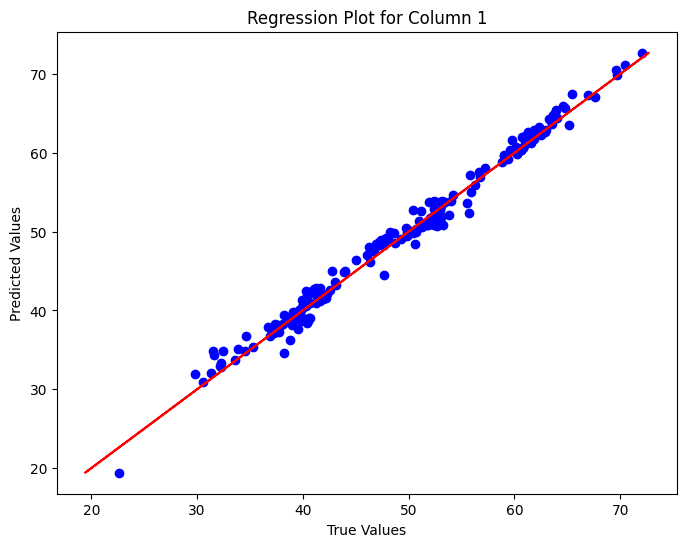

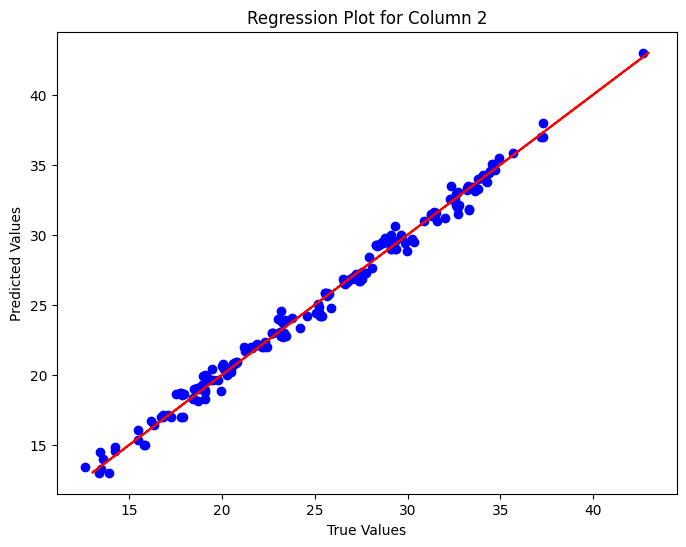

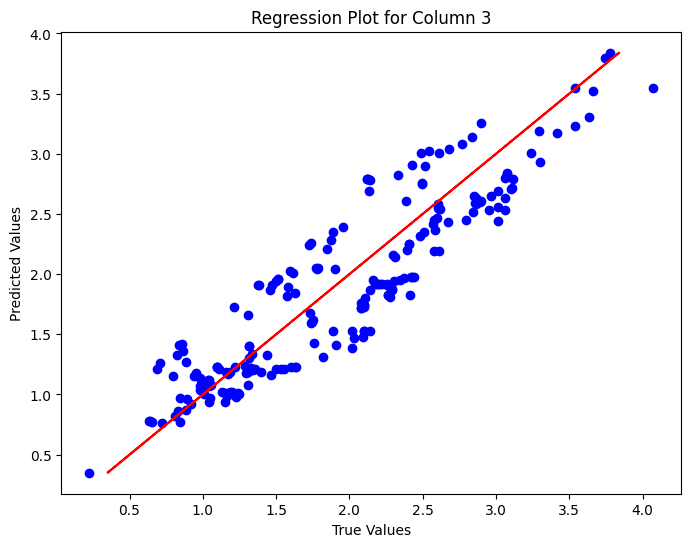

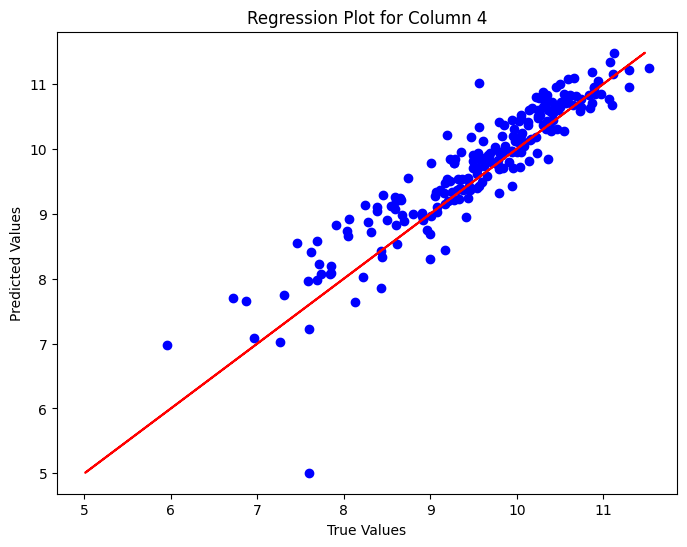

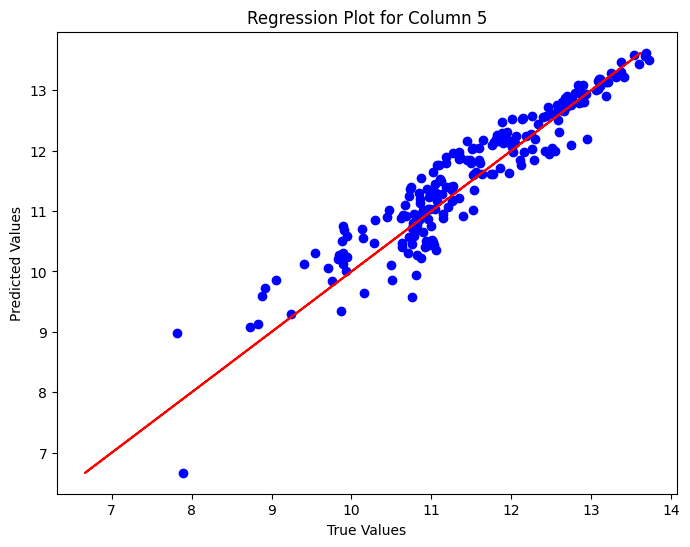

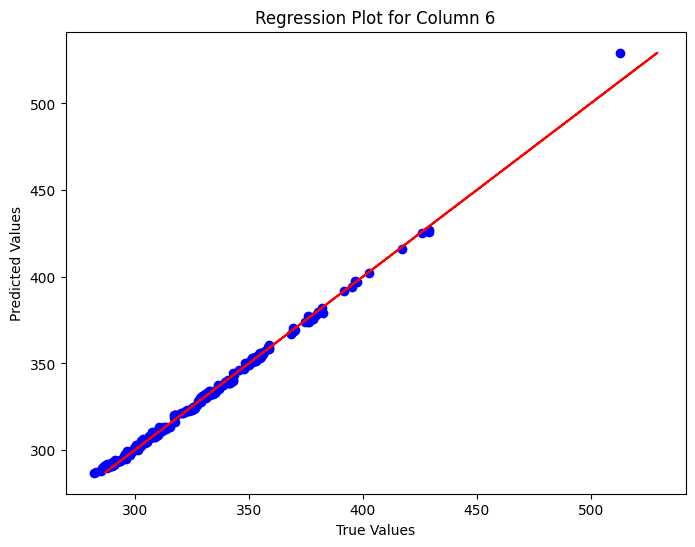

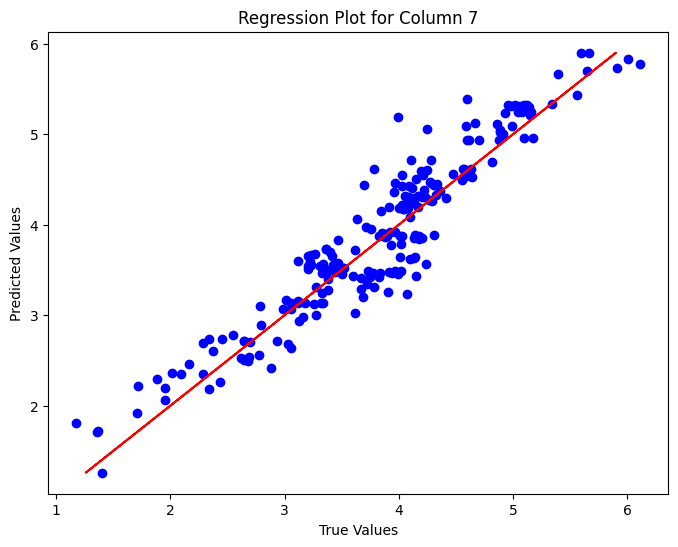

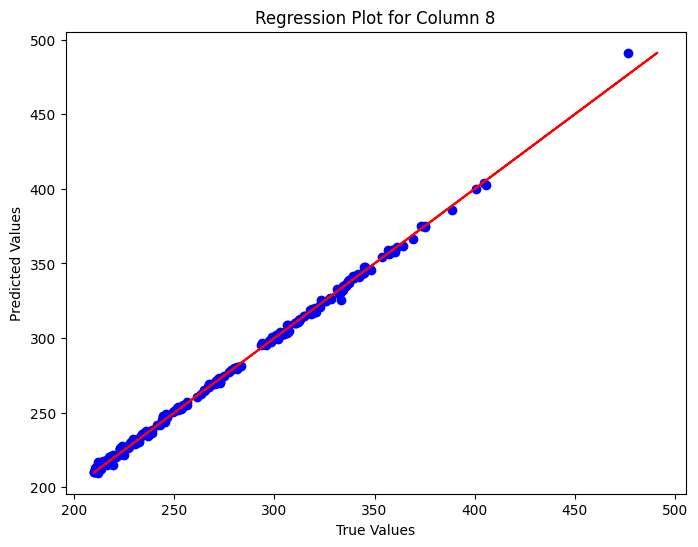

In [53]:
import matplotlib.pyplot as plt

# 각 컬럼별로 산점도 그리기
for i in range(predicted_test.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(predicted_test_df.iloc[:, 2*i], predicted_test_df.iloc[:, 2*i+1], color='blue')
    plt.plot(test_output.iloc[:, i], test_output.iloc[:, i], color='red')  # y=x 직선 그리기 (참 값과 예측 값이 일치하는 경우)
    plt.title(f'Regression Plot for Column {i+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()


In [ ]:
'''
from sklearn.model_selection import ParameterGrid

# 하이퍼파라미터 그리드 정의
param_grid = {
    'dropout_rate': [0.1 ,0.2, 0.3,],
    'learning_rate': [0.001, 0.01, 0.1],
    'hidden_layers': [1, 2, 3],
    'hidden_units': [128, 64, 32],
    'batch_size' : [32, 16, 8]
}


# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행

best_mse = float('inf')
best_params = {}
new_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['hidden_units'], activation='relu', input_shape=(9, )))
    model.add(keras.layers.Dropout(rate=params['dropout_rate']))
    
    for _ in range(params['hidden_layers']):
        model.add(keras.layers.Dense(params['hidden_units'], activation='relu'))
        model.add(keras.layers.Dropout(rate=params['dropout_rate']))
    
    model.add(keras.layers.Dense(8))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, batch_size = params['batch_size'], validation_data=(val_scale, val_output), epochs=1000, callbacks=[callback, checkpoint_cb], verbose=0)
    
    # 검증 세트에 대한 평가
    metrics = model.evaluate(val_scale, val_output, verbose=0)
    print("Validation MAE :", metrics[0])
    print("Validation MSE :", metrics[1])
    
    #데이터 저장
    data_params = [params['learning_rate'], params['dropout_rate'], params['hidden_layers'], params['hidden_units'], params['batch_size'], metrics[0], metrics[1]]
    params_df = pd.DataFrame({"Learning_Rate" : [params['learning_rate']], 'Dropout_Rate' : [params['dropout_rate']], "Hidden_units" : [params['hidden_units']], "Batch_size" : [params['batch_size']], "Validation_MAE" : [metrics[0]], "Validation_MSE" : [metrics[1]]})
    new_df = pd.concat([new_df, params_df], ignore_index = True)

    # 최적의 하이퍼파라미터와 MAE 업데이트
    if metrics[1] < best_mse:
        best_mse = metrics[1]
        best_params = params


    # 최적의 하이퍼파라미터 저장    
    model.save_weights('best-multiregression-hyperparameters.h5')
print("Best parameters:", best_params)
print("Best validation MAE:", best_mse)
'''

'\nfrom sklearn.model_selection import ParameterGrid\n\n# 하이퍼파라미터 그리드 정의\nparam_grid = {\n    \'dropout_rate\': [0.1 ,0.2, 0.3,],\n    \'learning_rate\': [0.001, 0.01, 0.1],\n    \'hidden_layers\': [1, 2, 3],\n    \'hidden_units\': [128, 64, 32],\n    \'batch_size\' : [32, 16, 8]\n}\n\n\n# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행\n\nbest_mse = float(\'inf\')\nbest_params = {}\nnew_df = pd.DataFrame()\n\nfor params in ParameterGrid(param_grid):\n    print("Training with parameters:", params)\n    \n    # 모델 생성\n    model = keras.Sequential()\n    model.add(keras.layers.Dense(params[\'hidden_units\'], activation=\'relu\', input_shape=(9, )))\n    model.add(keras.layers.Dropout(rate=params[\'dropout_rate\']))\n    \n    for _ in range(params[\'hidden_layers\']):\n        model.add(keras.layers.Dense(params[\'hidden_units\'], activation=\'relu\'))\n        model.add(keras.layers.Dropout(rate=params[\'dropout_rate\']))\n    \n    model.add(keras.layers.Dense(8))\n    \n    # 모델 컴파일\n    optimizer = tf.k

In [ ]:
'''
new_df.to_csv('gridsearch_hyperparameters_regression.csv')
print(new_df)
data = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_mse]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_MSE'])
grid_result.to_csv('Regression_GridSearch_Result')
print(grid_result)
'''

"\nnew_df.to_csv('gridsearch_hyperparameters_regression.csv')\nprint(new_df)\ndata = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_mse]\ngrid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_MSE'])\ngrid_result.to_csv('Regression_GridSearch_Result')\nprint(grid_result)\n"

In [ ]:
'''
data = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_mse]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_MSE'])
grid_result.to_csv('Regression_GridSearch_Result')
grid_result
'''

,Best_Hyperparameters
Batch_Size,32.000000
Dropout_Rate,0.200000
Hidden_Layers,1.000000
Hidden_Units,64.000000
Learning_Rate,0.001000
Best_MSE,5.161392


In [59]:
import random

param_randomsearch = {
    'hidden_layers': [],
    'hidden_units1': [],
    'hidden_units2': [],
    'hidden_units3': [],
    'hidden_units4': [],
    'hidden_units5': [],
    'dropout_rate1': [],
    'dropout_rate2': [],
    'dropout_rate3': [],
    'dropout_rate4': [],
    'dropout_rate5': [],
    'learning_rate': [],
    'batch_size' : [],
    'Validation_MAE' : [],
    'Validation_MSE' : []
    }

best_mse = float('inf')
best_param_ = {}
new_randomsearch_df = pd.DataFrame()

for _ in range(10):
    hidden_layers = random.randint(1, 4)
    hidden_units = random.randint(10, 200)
    dropout_rate = random.uniform(0.1, 0.4)
    learning_rate = random.uniform(0.1, 0.0001)
    batch_size = random.randint(8, 64)

    param_randomsearch['hidden_layers'].append(hidden_layers)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hidden_units, activation='relu', input_shape=(9, )))
    param_randomsearch['hidden_units{}'.format(1)].append(hidden_units)
    model.add(keras.layers.Dropout(rate=dropout_rate))
    param_randomsearch['dropout_rate{}'.format(1)].append(dropout_rate)
    
    for i in range(hidden_layers):
        hidden_units_random = random.randint(10, 200)
        model.add(keras.layers.Dense(units = hidden_units_random, activation='relu'))
        param_randomsearch['hidden_units{}'.format(i+2)].append(hidden_units_random)
        dropout_rate_random = random.uniform(0.1, 0.4)
        model.add(keras.layers.Dropout(rate=dropout_rate_random))
        param_randomsearch['dropout_rate{}'.format(i+2)].append(dropout_rate_random)
    
    model.add(keras.layers.Dense(8))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    param_randomsearch['learning_rate'].append(learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, batch_size = batch_size, validation_data=(val_scale, val_output), epochs=1000, callbacks=[callback, checkpoint_cb], verbose=0)
    param_randomsearch['batch_size'].append(batch_size)
    
    # 검증 세트에 대한 평가
    metrics = model.evaluate(val_scale, val_output, verbose=0)
    print(param_randomsearch)
    print("Validation MAE :", metrics[0])
    print("Validation MSE :", metrics[1])

    param_randomsearch['Validation_MAE'].append(metrics[0])
    param_randomsearch['Validation_MSE'].append(metrics[1])
    #데이터 저장

    param_randomsearch_df = pd.DataFrame()
    for key, value in param_randomsearch.items():
        param_randomsearch_df[key] = pd.Series(value, index=range(len(value)))

    new_randomsearch_df = pd.concat([new_randomsearch_df, param_randomsearch_df], ignore_index = True)
    print(new_randomsearch_df)
    #데이터프레임 초기화

    # 최적의 하이퍼파라미터와 MAE 업데이트
    if metrics[1] < best_mse:
        best_mse = metrics[1]
        best_param_randomsearch = param_randomsearch

    param_randomsearch = {
        'hidden_layers': [],
        'hidden_units1': [],
        'hidden_units2': [],
        'hidden_units3': [],
        'hidden_units4': [],
        'hidden_units5': [],
        'dropout_rate1': [],
        'dropout_rate2': [],
        'dropout_rate3': [],
        'dropout_rate4': [],
        'dropout_rate5': [],
        'learning_rate': [],
        'batch_size' : [],
        'Validation_MAE' : [],
        'Validation_MSE' : []
        }

    # 최적의 하이퍼파라미터 저장    
model.save_weights('best-multiregression-hyperparameters.h5')
print("Best parameters:", best_param_randomsearch)
print("Best validation MSE:", best_mse)

2024-03-21 17:04:00.402536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 17:04:01.246525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
{'hidden_layers': [1], 'hidden_units1': [34], 'hidden_units2': [111], 'hidden_units3': [], 'hidden_units4': [], 'hidden_units5': [], 'dropout_rate1': [0.39407942582711375], 'dropout_rate2': [0.18017478526700714], 'dropout_rate3': [], 'dropout_rate4': [], 'dropout_rate5': [], 'learning_rate': [0.06993252706220912], 'batch_size': [29], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 942.3603515625
Validation MSE : 16.577159881591797
   hidden_layers  hidden_units1  hidden_units2 hidden_units3 hidden_units4   
0              1             34            111           NaN           NaN  \

  hidden_units5  dropout_rate1  dropout_rate2 dropout_rate3 dropout_rate4   
0           NaN       0.394079       0.180175           NaN           NaN  \

  dropout_rate5  learning_rate  batch_size  Validation_MAE  Validation_MSE  
0           NaN       0.069933          29      942.360352        16.57716  


2024-03-21 17:04:12.607062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 17:04:13.626159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 46: early stopping
{'hidden_layers': [3], 'hidden_units1': [125], 'hidden_units2': [40], 'hidden_units3': [16], 'hidden_units4': [19], 'hidden_units5': [], 'dropout_rate1': [0.33606818865064403], 'dropout_rate2': [0.24923943857797248], 'dropout_rate3': [0.22052130425697022], 'dropout_rate4': [0.17902791579242783], 'dropout_rate5': [], 'learning_rate': [0.05245016089456776], 'batch_size': [59], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 1209.4049072265625
Validation MSE : 19.81385040283203
   hidden_layers  hidden_units1  hidden_units2 hidden_units3 hidden_units4   
0              1             34            111           NaN           NaN  \
1              3            125             40            16            19   

  hidden_units5  dropout_rate1  dropout_rate2  dropout_rate3  dropout_rate4   
0           NaN       0.394079       0.180175            NaN            NaN  \
1           NaN       0.336068       0.249239       0.220521       0.179028   

  dropout

2024-03-21 17:04:23.732609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 17:04:24.485484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
{'hidden_layers': [3], 'hidden_units1': [81], 'hidden_units2': [85], 'hidden_units3': [24], 'hidden_units4': [84], 'hidden_units5': [], 'dropout_rate1': [0.10953406466616424], 'dropout_rate2': [0.11584979281693275], 'dropout_rate3': [0.1502749808915595], 'dropout_rate4': [0.16798868518090376], 'dropout_rate5': [], 'learning_rate': [0.026974315343449684], 'batch_size': [29], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 9033.1552734375
Validation MSE : 67.93376159667969
   hidden_layers  hidden_units1  hidden_units2 hidden_units3 hidden_units4   
0              1             34            111           NaN           NaN  \
1              3            125             40            16            19   
2              3             81             85            24            84   

  hidden_units5  dropout_rate1  dropout_rate2  dropout_rate3  dropout_rate4   
0           NaN       0.394079       0.180175            NaN            NaN  \
1           NaN

2024-03-21 17:04:36.153118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 17:04:37.316165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
{'hidden_layers': [3], 'hidden_units1': [164], 'hidden_units2': [156], 'hidden_units3': [85], 'hidden_units4': [112], 'hidden_units5': [], 'dropout_rate1': [0.19756883868766686], 'dropout_rate2': [0.30475140513931864], 'dropout_rate3': [0.21692759841766643], 'dropout_rate4': [0.32224519763114856], 'dropout_rate5': [], 'learning_rate': [0.03105682337129327], 'batch_size': [24], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 633817.6875
Validation MSE : 523.46826171875
   hidden_layers  hidden_units1  hidden_units2 hidden_units3 hidden_units4   
0              1             34            111           NaN           NaN  \
1              3            125             40            16            19   
2              3             81             85            24            84   
3              3            164            156            85           112   

  hidden_units5  dropout_rate1  dropout_rate2  dropout_rate3  dropout_rate4   
0           NaN    

2024-03-21 17:04:49.426067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 17:04:50.995414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 32: early stopping
{'hidden_layers': [3], 'hidden_units1': [10], 'hidden_units2': [192], 'hidden_units3': [95], 'hidden_units4': [38], 'hidden_units5': [], 'dropout_rate1': [0.19986040394614937], 'dropout_rate2': [0.19843687114670955], 'dropout_rate3': [0.18227565135281854], 'dropout_rate4': [0.24888307059033954], 'dropout_rate5': [], 'learning_rate': [0.08839503207466487], 'batch_size': [48], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 7334645760.0
Validation MSE : 31788.232421875
   hidden_layers  hidden_units1  hidden_units2 hidden_units3 hidden_units4   
0              1             34            111           NaN           NaN  \
1              3            125             40            16            19   
2              3             81             85            24            84   
3              3            164            156            85           112   
4              3             10            192            95            38   

  hidden_units5  drop

2024-03-21 17:04:59.568238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 17:05:00.423340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 30: early stopping
{'hidden_layers': [1], 'hidden_units1': [114], 'hidden_units2': [88], 'hidden_units3': [], 'hidden_units4': [], 'hidden_units5': [], 'dropout_rate1': [0.20049451313911876], 'dropout_rate2': [0.15243785590667325], 'dropout_rate3': [], 'dropout_rate4': [], 'dropout_rate5': [], 'learning_rate': [0.01716226650553157], 'batch_size': [35], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 492.17401123046875
Validation MSE : 13.241802215576172
   hidden_layers  hidden_units1  hidden_units2 hidden_units3 hidden_units4   
0              1             34            111           NaN           NaN  \
1              3            125             40            16            19   
2              3             81             85            24            84   
3              3            164            156            85           112   
4              3             10            192            95            38   
5              1            114             88         

2024-03-21 17:05:08.830358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 17:05:09.958740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 27: early stopping
{'hidden_layers': [2], 'hidden_units1': [83], 'hidden_units2': [97], 'hidden_units3': [116], 'hidden_units4': [], 'hidden_units5': [], 'dropout_rate1': [0.24014264979693142], 'dropout_rate2': [0.1861900416799851], 'dropout_rate3': [0.3836713279392029], 'dropout_rate4': [], 'dropout_rate5': [], 'learning_rate': [0.005952686037547866], 'batch_size': [19], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 119477.9140625
Validation MSE : 232.77618408203125
   hidden_layers  hidden_units1  hidden_units2 hidden_units3 hidden_units4   
0              1             34            111           NaN           NaN  \
1              3            125             40            16            19   
2              3             81             85            24            84   
3              3            164            156            85           112   
4              3             10            192            95            38   
5              1            114        

2024-03-21 17:05:23.152561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 17:05:24.039153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
{'hidden_layers': [1], 'hidden_units1': [77], 'hidden_units2': [140], 'hidden_units3': [], 'hidden_units4': [], 'hidden_units5': [], 'dropout_rate1': [0.2536683379989888], 'dropout_rate2': [0.3852523346071711], 'dropout_rate3': [], 'dropout_rate4': [], 'dropout_rate5': [], 'learning_rate': [0.014668882510167], 'batch_size': [21], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 724.08837890625
Validation MSE : 19.027971267700195
   hidden_layers  hidden_units1  hidden_units2 hidden_units3 hidden_units4   
0              1             34            111           NaN           NaN  \
1              3            125             40            16            19   
2              3             81             85            24            84   
3              3            164            156            85           112   
4              3             10            192            95            38   
5              1            114             88           NaN  

2024-03-21 17:05:35.258539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 17:05:36.444718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
{'hidden_layers': [3], 'hidden_units1': [138], 'hidden_units2': [149], 'hidden_units3': [28], 'hidden_units4': [116], 'hidden_units5': [], 'dropout_rate1': [0.34738558636577305], 'dropout_rate2': [0.33480946872210027], 'dropout_rate3': [0.23002436296963186], 'dropout_rate4': [0.2738358573509226], 'dropout_rate5': [], 'learning_rate': [0.07211965535264524], 'batch_size': [36], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 3265695232.0
Validation MSE : 49682.12109375
   hidden_layers  hidden_units1  hidden_units2 hidden_units3 hidden_units4   
0              1             34            111           NaN           NaN  \
1              3            125             40            16            19   
2              3             81             85            24            84   
3              3            164            156            85           112   
4              3             10            192            95            38   
5              1      

2024-03-21 17:05:43.384229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 17:05:45.233032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 32: early stopping
{'hidden_layers': [2], 'hidden_units1': [117], 'hidden_units2': [50], 'hidden_units3': [170], 'hidden_units4': [], 'hidden_units5': [], 'dropout_rate1': [0.3511254317123863], 'dropout_rate2': [0.35548931558309704], 'dropout_rate3': [0.20198073795579655], 'dropout_rate4': [], 'dropout_rate5': [], 'learning_rate': [0.009041536926067475], 'batch_size': [10], 'Validation_MAE': [], 'Validation_MSE': []}
Validation MAE : 275064.59375
Validation MSE : 399.40118408203125
   hidden_layers  hidden_units1  hidden_units2 hidden_units3 hidden_units4   
0              1             34            111           NaN           NaN  \
1              3            125             40            16            19   
2              3             81             85            24            84   
3              3            164            156            85           112   
4              3             10            192            95            38   
5              1            114        

In [64]:
new_randomsearch_df.to_csv('new_randomsearch_df.csv')
new_randomsearch_df

,hidden_layers,hidden_units1,hidden_units2,hidden_units3,hidden_units4,hidden_units5,dropout_rate1,dropout_rate2,dropout_rate3,dropout_rate4,dropout_rate5,learning_rate,batch_size,Validation_MAE,Validation_MSE
0,1,34,111,NaN,NaN,NaN,0.394079,0.180175,NaN,NaN,NaN,0.069933,29,9.423604e+02,16.577160
1,3,125,40,16,19,NaN,0.336068,0.249239,0.220521,0.179028,NaN,0.052450,59,1.209405e+03,19.813850
2,3,81,85,24,84,NaN,0.109534,0.115850,0.150275,0.167989,NaN,0.026974,29,9.033155e+03,67.933762
3,3,164,156,85,112,NaN,0.197569,0.304751,0.216928,0.322245,NaN,0.031057,24,6.338177e+05,523.468262
4,3,10,192,95,38,NaN,0.199860,0.198437,0.182276,0.248883,NaN,0.088395,48,7.334646e+09,31788.232422
5,1,114,88,NaN,NaN,NaN,0.200495,0.152438,NaN,NaN,NaN,0.017162,35,4.921740e+02,13.241802
6,2,83,97,116,NaN,NaN,0.240143,0.186190,0.383671,NaN,NaN,0.005953,19,1.194779e+05,232.776184
7,1,77,140,NaN,NaN,NaN,0.253668,0.385252,NaN,NaN,NaN,0.014669,21,7.240884e+02,19.027971
8,3,138,149,28,116,NaN,0.347386,0.334809,0.230024,0.273836,NaN,0.072120,36,3.265695e+09,49682.121094
9,2,117,50,170,NaN,NaN,0.351125,0.355489,0.201981,NaN,NaN,0.009042,10,2.750646e+05,399.401184


In [62]:
data = [[best_param_randomsearch['batch_size']],  [best_param_randomsearch['dropout_rate1']], [best_param_randomsearch['dropout_rate2']], [best_param_randomsearch['dropout_rate3']], [best_param_randomsearch['dropout_rate4']], [best_param_randomsearch['dropout_rate5']], [best_param_randomsearch['hidden_layers']], 
        [best_param_randomsearch['hidden_units1']], [best_param_randomsearch['hidden_units2']], [best_param_randomsearch['hidden_units3']], [best_param_randomsearch['hidden_units4']], [best_param_randomsearch['hidden_units5']], [best_param_randomsearch['learning_rate']], [best_mse]]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate1', 'Dropout_Rate2', 'Dropout_Rate3', 'Dropout_Rate4', 'Dropout_Rate5','Hidden_Layers', 'Hidden_Units1', 'Hidden_Units2', 'Hidden_Units3', 'Hidden_Units4', 'Hidden_Units5', 'Learning_Rate', 'Best_MSE'])
grid_result.to_csv('Regression_GridSearch_Result')
grid_result

,Best_Hyperparameters
Batch_Size,[35]
Dropout_Rate1,[0.20049451313911876]
Dropout_Rate2,[0.15243785590667325]
Dropout_Rate3,[]
Dropout_Rate4,[]
Dropout_Rate5,[]
Hidden_Layers,[1]
Hidden_Units1,[114]
Hidden_Units2,[88]
Hidden_Units3,[]
